In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('titanic.csv', index_col=0, parse_dates=True)
df.head()

/tmp/ipykernel_11790/1887598042.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('titanic.csv', index_col=0, parse_dates=True)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/tmp/ipykernel_11790/2570249897.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_11790/2570249897.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Цена жилья [69.85033356]
        Вес (Weight)
Pclass    -27.156174
Sex         2.561906
Age        -0.306410
SibSp       6.445239
Parch       8.314051
Базовый уровень (Intercept): 32.5862761235955
Цена в долларах: 86945.5


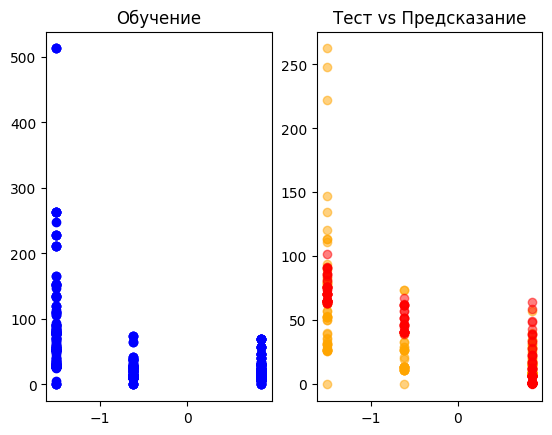

In [4]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

def age_category(Age):
    if Age < 18:
        return 0**2
    elif Age < 55:
        return 1**2
    else:
        return 2**2
df['Age'] = df['Age'].apply(age_category)
df['Pclass'] = df['Pclass']**2 


features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

xtrain, xtest, ytrain, ytest = train_test_split(df[features], df["Fare"], test_size=0.2, random_state=42)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

model = LinearRegression()
model.fit(xtrain, ytrain)


pclass = int(input("Класс (1, 2, 3): "))**2
sex = int(input("Пол (0 - мужской, 1 - женский): "))
age = int(input("Возраст: "))
sibsp = int(input("Количество братьев/сестер: "))
parch = int(input("Количество родителей/детей: "))

jack = [[pclass, sex, age_category(age), sibsp, parch]]
jack_scaled = scaler.transform(jack)

prediction = model.predict(jack_scaled)

print("Цена жилья", prediction)

coeff = pd.DataFrame(model.coef_.T, index=features, columns=['Вес (Weight)'])
print(coeff)
print("Базовый уровень (Intercept):", model.intercept_)


def convert(pounds_1912):
    # 1. Золотое содержание 1 фунта в 1912 году (в граммах)
    gold_per_pound_1912 = 7.322
    
    # Актуальная цена золота за 1 грамм в USD (на 28.01.2026)
    current_gold_price_usd_per_gram = 170.0 
    
    # Считаем общую массу золота в фунтах 1912 года
    total_gold_grams = pounds_1912 * gold_per_pound_1912
    
    # Переводим это золото в современные доллары
    modern_usd = total_gold_grams * current_gold_price_usd_per_gram
    
    return round(modern_usd, 2)

print("Цена в долларах:", convert(prediction[0]))
predictions = model.predict(xtest)

fig, ax = plt.subplots(1, 2)

#(обучающие данные)
ax[0].scatter(xtrain[:, 0], ytrain, color='blue')
ax[0].set_title("Обучение")

#(тест и предсказания)
ax[1].scatter(xtest[:, 0], ytest, color='orange', alpha=0.5)    # Реальные ответы
ax[1].scatter(xtest[:, 0], predictions, color='red', alpha=0.5) # Предсказания
ax[1].set_title("Тест vs Предсказание")
plt.show()


# Анализ данных пассажиров Титаника 
В этом проекте мы предсказываем стоимость билетов с помощью машинного обучения.